# *Scientific Programming with Python - Final Project  Feb  2021*
## Customers Classification
### Ido Betesh

######  [Intro](#Intro)  |   [Initial Data Analysis](#Initial)  |    [Exploratory Data Analysis](#Exploratory)  |   [Classification Model](#Classification)  |   [Summary](#Summary)


<a id="Intro"></a>
# Intro ☕️
The dataset I received holds customer data grouping by shopping behavior and personal information in order to improve targeted marketing.
It has 15 features (include ID) both numerical and categorical.
Its size is 8120 rows x 15 columns, customers are classified into 4 shopping groups [A,B,C,D]

In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install pydotplus

     |████████████████████████████████| 285 kB 4.1 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=b1ac4a8bf73eee2bf59f0ebc340d314e1e7217d0cd65fcf11abebb2a8c03c659
  Stored in directory: /home/jovyan/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
     |████████████████████████████████| 278 kB 4.4 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=407a101ceef8e3c24fb5bd6221a9d2ee51f2248706081ac0309d8a1b731433b1
  Stored in directory: /home/jovyan/.cache/pip/wheels/1f/5c/ba/f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('customers2.csv') 
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Group
0,462809.0,Male,No,22.0,No,Healthcare,1.0,average,4.0,4.0,13.358,12.344,7.289,-5.184,D
1,462643.0,Female,Yes,38.0,Yes,Engineer,NaN,Average,3.0,4.0,4.049,5.010,3.936,2.621,A
2,466315.0,Female,Yes,67.0,Yes,Engineer,1.0,Low,1.0,6.0,9.349,3.823,2.950,0.583,B
3,461735.0,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,6.0,-0.617,-2.289,6.696,3.299,B
4,462669.0,Female,Yes,40.0,Yes,Entertainment,NaN,NaN,6.0,6.0,6.318,5.407,5.391,2.580,A
5,461319.0,Male,Yes,56.0,No,Artist,0.0,average,2.0,NaN,10.270,11.683,12.740,4.996,C
6,460156.0,Male,No,32.0,Yes,Healthcare,1.0,Low,3.0,6.0,13.422,2.968,5.226,5.370,C
7,464347.0,Female,No,33.0,Yes,Healthcare,1.0,Low,3.0,6.0,12.074,1.829,7.381,6.384,D
8,465015.0,Female,Yes,61.0,Yes,Engineer,0.0,Low,3.0,7.0,8.891,2.658,-1.026,6.459,D
9,465176.0,Female,Yes,55.0,Yes,Artist,1.0,Average,4.0,6.0,13.460,4.421,9.754,14.732,C


In [4]:
df.describe()

,ID,Age,Work_Experience,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat
count,7829.000000,7899.000000,7286.000000,7676.000000,7829.000000,8005.000000,8120.000000,8120.000000,8120.000000
mean,463499.512581,43.468287,2.638210,2.852658,5.089156,7.750935,5.331856,6.096408,4.433825
std,2606.526064,16.745933,3.402537,1.533825,1.502160,4.984446,3.611203,4.230066,4.460564
min,458982.000000,18.000000,0.000000,1.000000,0.000000,-7.759000,-6.657000,-8.089000,-9.622000
25%,461247.000000,30.000000,0.000000,2.000000,4.000000,4.329000,3.069000,3.354000,1.540000
50%,463503.000000,40.000000,1.000000,3.000000,6.000000,7.104000,5.143500,5.590500,4.054500
75%,465787.000000,53.000000,4.000000,4.000000,6.000000,10.947000,7.475000,8.365000,6.856250
max,467974.000000,89.000000,14.000000,9.000000,7.000000,27.020000,21.430000,26.944000,22.597000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7829 non-null   float64
 1   Gender           8120 non-null   object 
 2   Ever_Married     7979 non-null   object 
 3   Age              7899 non-null   float64
 4   Graduated        8042 non-null   object 
 5   Profession       7718 non-null   object 
 6   Work_Experience  7286 non-null   float64
 7   Spending_Score   8019 non-null   object 
 8   Family_Size      7676 non-null   float64
 9   Shop_Day         7829 non-null   float64
 10  Shop_Other       8005 non-null   float64
 11  Shop_Dairy       8120 non-null   float64
 12  Shop_Household   8120 non-null   float64
 13  Shop_Meat        8120 non-null   float64
 14  Group            8120 non-null   object 
dtypes: float64(9), object(6)
memory usage: 951.7+ KB


## Features:
- ID: Customer ID (unique)
- Gender: Boolean, Male/Female
- Ever_Married: Boolean, Yes/No - was the customer married
- Age: Float, customer age (18 and above)
- Graduated: Boolean, Yes/No - is the customer a high school graduate
- Profession: Categorical - customer profession 
  {'Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive' 'Doctor' 'Homemaker' 'Marketing'}
- Work_Experience: Integer - number of years of work experience
- Spending_Score: Categorical, Low/Average/High - spending habits
- Family_Size: Integer - number of family members (household)
- Shop_Day: Categorical, 1-7 (Sunday-Saturday) - day of week when most shopping occurs by customer
- Shop_Other: Float - normalized measure of customer deviation from average store     customer spending on non specified products
- Shop_Dairy: Float - normalized measure of customer deviation from average store customer spending on dairy products
- Shop_Household: Float - normalized measure of customer deviation from average store customer spending on household products
- Shop_Meat: continuous - normalized measure of customer deviation from average store customer spending on meat products
- Target Feature: Group: A,B,C,D



### Initial thoughts about the data 🧐 
1. Strong correlation between Profession and Spending_Score.
2. Strong correlation between Age and Spending_Score.
3. Strong correlation between Profession and Shop_Meat.
4. Strong correlation between Profession and Shop_Dairy.
5. Strong correlation between Gender and Spending_Score.


###### Since the ID number is not important, let's remove its column <br> Also, find out the different professions in the data set.

In [6]:
df.drop(['ID'], axis=1, inplace=True)
print(df['Profession'].unique())

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]


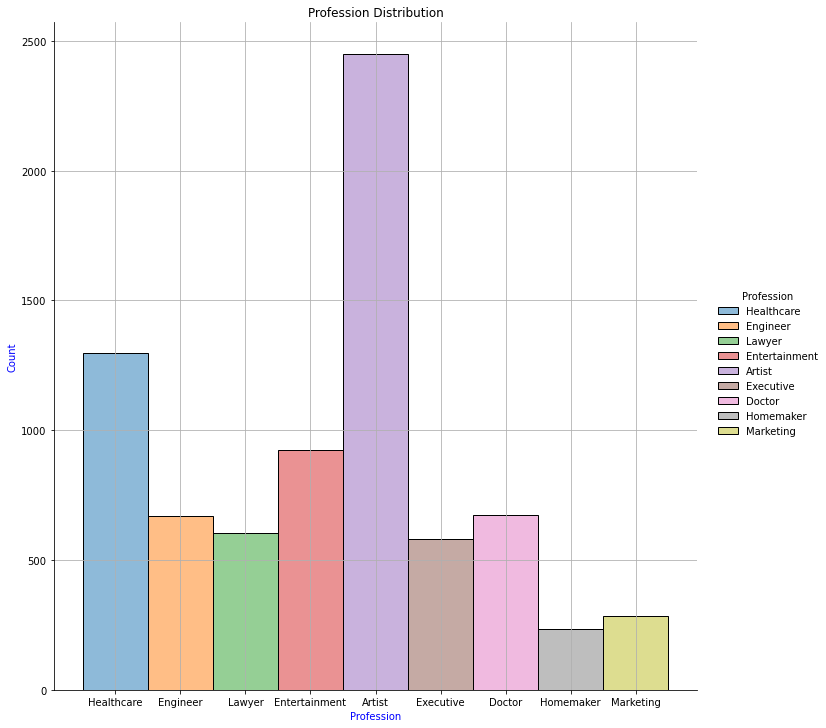

In [7]:
df = df.dropna(axis=0, subset=['Profession'])
fig = sns.displot(df, x="Profession", hue="Profession",height=10)
plt.title('Profession Distribution')
plt.ylabel('Count', color='blue')
plt.xlabel('Profession', color='blue')
plt.grid(True)
plt.show()

In [8]:
count_precent_tablt_profession = pd.DataFrame()
count_precent_tablt_profession["count"] = df["Profession"].value_counts()
count_precent_tablt_profession["count%"] = round((df["Profession"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_profession

,count,count%
Artist,2449,31.731
Healthcare,1297,16.805
Entertainment,925,11.985
Doctor,672,8.707
Engineer,670,8.681
Lawyer,605,7.839
Executive,580,7.515
Marketing,284,3.680
Homemaker,236,3.058


In [9]:
count_precent_tablt_gender = pd.DataFrame()
count_precent_tablt_gender["count"] = df["Gender"].value_counts()
count_precent_tablt_gender["count%"] = round((df["Gender"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_gender

,count,count%
Male,4238,54.911
Female,3480,45.089


In [10]:
df.Spending_Score = df.Spending_Score.str.lower()

In [11]:
count_precent_tablt_Spending_Score = pd.DataFrame()
count_precent_tablt_Spending_Score["count"] = df["Spending_Score"].value_counts()
count_precent_tablt_Spending_Score["count%"] = round((df["Spending_Score"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_Spending_Score

,count,count%
low,4038,52.319
average,2556,33.117
high,1029,13.332


In [12]:
count_precent_tablt_group = pd.DataFrame()
count_precent_tablt_group["count"] = df["Group"].value_counts()
count_precent_tablt_group["count%"] = round((df["Group"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_group

,count,count%
D,2156,27.935
C,1903,24.657
A,1881,24.372
B,1778,23.037


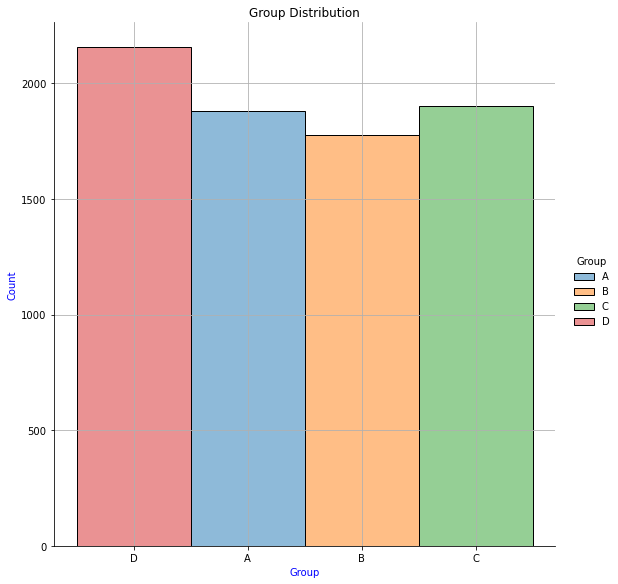

In [13]:
fig = sns.displot(df, x="Group",hue="Group", hue_order=['A','B','C','D'], height=8)
plt.title('Group Distribution')
plt.ylabel('Count', color='blue')
plt.xlabel('Group', color='blue')
plt.grid(True)
plt.show()

<a id="Initial"></a>
# Initial Data Analysis 📈

In my data set were:<br>
<u>__Categorical Features:__</u>
- Gender
- Ever_Married
- Graduated
- Profession
- Spending_Score
- Group

<u>__Numeric Features:__</u>
- Age
- Work_Experience
- Family_Size
- Shop_Day
- Shop_Other
- Shop_Dairy
- Shop_Household
- Shop_Meat

I have found the categorical data divided into ordinal and nominal data:

<u>__Numinal:__</u>
- Profession - the order of professions does not matter.
- Gender - Male/Female does not make any order.
- Ever_Married - (boolean)
- Graduated - (boolean)
- Group - 4 groups (A, B, C, D).

<u>__Ordinal:__</u>
- Spending_Score - divided into three levels (low < average < high).


### Data Cleanup 🧽
In order to analyze the data the best way possible, I had to get rid of the missing data or fill them (where data is categorical) and replace the missing numeric values with the mean of any numeric column so that it does not disturb the data analysis and cause any distortion.

<u>__More things I considered crucial in order to create a clean CSV file:__</u>
- Removed ID column which is not relevant.
- Since there is no day 0, I Removed all rows where 
Shop_Day == 0 (72 rows).
- Keep all float numbers data 3 digits rounded.
- Change days to int instead of float.
- I have noticed that the Spending_Score data has lower and upper case mixed (e.g. 'Average' | 'average'), so I replaced all categorical data to be lower case, in Profession I have not, since these were not mixed.
- Drop all rows where Profession is ‘na’
- Filled all missing Gradueted with No.
- Filled all missing Ever_Married with No.
- Filled all missing numeric with their feature mean.
- Added converted columns for categorical features to dummies (Gender, Ever_Married, Graduated, Profession, Spending_Score, Group) in order to plot them in the correlation heat map in the next task.
- Added categorical range-base columns for numeric features (Age, Work_Experience, Family_Size, Shop_Other,Shop_Dairy, Shop_Household, Shop_Meat).
- finally, dropped all 'na' remained in the data set (95 rows)

#### Numeric Manipulation, fill all missing numeric with mean

In [14]:
df.Age = df.Age.fillna(df.Age.mean())
df.Work_Experience = df.Work_Experience.fillna(df.Work_Experience.mean())
df.Family_Size = df.Family_Size.fillna(df.Family_Size.mean())
df.Shop_Day = df.Shop_Day.fillna(df.Shop_Day.mean())
df.Shop_Other = df.Shop_Other.fillna(df.Shop_Other.mean())
df.Shop_Dairy = df.Shop_Dairy.fillna(df.Shop_Dairy.mean())
df.Shop_Household = df.Shop_Household.fillna(df.Shop_Household.mean())
df.Shop_Meat = df.Shop_Meat.fillna(df.Shop_Meat.mean())

#### Remove all rows where Shop_Day == 0

In [15]:
df = df[df.Shop_Day != 0.0] # 72 rows in total

#### Assume that where Ever_Married or Gradated is 'na' to be No

In [16]:
df["Ever_Married"].fillna("No", inplace=True)
df["Graduated"].fillna("No", inplace=True)

In [17]:
df = df.dropna() # 95 rows
df = df.reset_index(drop=True)
df = df.round(3)
df['Shop_Day'] = df['Shop_Day'].astype(int)
df.to_csv('clean_customers.csv', index=False) # attached within the submission zip
df.tail(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Group
7544,Male,Yes,48.0,Yes,Executive,4.000,high,3.0,6,12.499,16.786,14.451,7.320,C
7545,Male,No,19.0,No,Healthcare,0.000,low,3.0,6,8.398,8.804,7.952,4.404,D
7546,Male,No,20.0,No,Healthcare,1.000,low,5.0,6,3.399,1.653,6.673,-1.797,B
7547,Female,Yes,25.0,Yes,Artist,0.000,average,2.0,2,-1.780,11.422,4.335,4.503,B
7548,Female,Yes,66.0,Yes,Lawyer,1.000,high,2.0,6,11.402,5.551,18.887,3.857,C
7549,Male,Yes,48.0,Yes,Artist,3.000,low,1.0,6,5.914,7.428,0.873,5.510,B
7550,Male,Yes,45.0,Yes,Entertainment,4.000,average,2.0,6,14.273,2.803,16.253,12.015,C
7551,Male,Yes,46.0,Yes,Entertainment,5.000,low,1.0,2,11.866,13.276,13.803,9.112,C
7552,Female,No,53.0,Yes,Entertainment,2.648,low,2.0,6,18.431,-0.759,18.014,6.715,C
7553,Female,No,43.0,Yes,Healthcare,9.000,average,3.0,7,3.173,1.366,2.613,-0.116,A


#### Numeric to Categorical Using Dummies

In [18]:
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Ever_Married'], prefix='Ever_Married')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Graduated'], prefix='Graduated')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Profession'], prefix='Profession')], axis=1)

#### Represent Numeric features as Categorical range-based features

In [19]:
df['Age_Range'] = np.where(df.Age>=60, '60+', np.where(df.Age>=50, '50-60', np.where(df.Age>=40, '40-50', np.where(df.Age>=30, '30-40', np.where(df.Age>=18, '18-30', '-18')))))
df['Work_Experience_Range'] = np.where(df.Work_Experience>=10, '10+', np.where(df.Work_Experience>=5, '5-10', '0-5'))
df['Family_Size_Range'] = np.where(df.Family_Size>=6, '6+', np.where(df.Family_Size>=3, '3-6', '0-3'))
df['Shop_Other_Range'] = np.where(df.Shop_Other>=20, '20+', np.where(df.Shop_Other>=10, '10-20', np.where(df.Shop_Other>=0, '0-10', '-0'))) # -10,0,10,20
df['Shop_Dairy_Range'] = np.where(df.Shop_Dairy>=20, '20+', np.where(df.Shop_Dairy>=10, '10-20', np.where(df.Shop_Dairy>=0, '0-10', '-0'))) # -10,0,10,20
df['Shop_Household_Range'] = np.where(df.Shop_Household>=20, '20+', np.where(df.Shop_Household>=10, '10-20', np.where(df.Shop_Household>=0, '0-10', '-0'))) # -10,0,10,20
df['Shop_Meat_Range'] = np.where(df.Shop_Meat>=20, '20+', np.where(df.Shop_Meat>=10, '10-20', np.where(df.Shop_Meat>=0, '0-10', '-0'))) # -10,0,10,20
df.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Age_Range,Work_Experience_Range,Family_Size_Range,Shop_Other_Range,Shop_Dairy_Range,Shop_Household_Range,Shop_Meat_Range
0,Male,No,22.0,No,Healthcare,1.000,average,4.0,4,13.358,...,0,0,0,18-30,0-5,3-6,10-20,10-20,0-10,-0
1,Female,Yes,38.0,Yes,Engineer,2.648,average,3.0,4,4.049,...,0,0,0,30-40,0-5,3-6,0-10,0-10,0-10,0-10
2,Female,Yes,67.0,Yes,Engineer,1.000,low,1.0,6,9.349,...,0,0,0,60+,0-5,0-3,0-10,0-10,0-10,0-10
3,Male,Yes,67.0,Yes,Lawyer,0.000,high,2.0,6,-0.617,...,0,1,0,60+,0-5,0-3,-0,-0,0-10,0-10
4,Male,Yes,56.0,No,Artist,0.000,average,2.0,5,10.270,...,0,0,0,50-60,0-5,0-3,10-20,10-20,10-20,0-10
5,Male,No,32.0,Yes,Healthcare,1.000,low,3.0,6,13.422,...,0,0,0,30-40,0-5,3-6,10-20,0-10,0-10,0-10
6,Female,No,33.0,Yes,Healthcare,1.000,low,3.0,6,12.074,...,0,0,0,30-40,0-5,3-6,10-20,0-10,0-10,0-10
7,Female,Yes,61.0,Yes,Engineer,0.000,low,3.0,7,8.891,...,0,0,0,60+,0-5,3-6,0-10,0-10,-0,0-10
8,Female,Yes,55.0,Yes,Artist,1.000,average,4.0,6,13.460,...,0,0,0,50-60,0-5,3-6,10-20,0-10,0-10,10-20
9,Female,No,26.0,Yes,Engineer,1.000,low,3.0,6,5.523,...,0,0,0,18-30,0-5,3-6,0-10,0-10,0-10,0-10


In [20]:
df['Spending_Score_Level'] = pd.Categorical(df['Spending_Score'], ordered=True, categories=['low', 'average', 'high']).codes+1 
df['Group_Level'] = pd.Categorical(df['Group'], ordered=True, categories=['A','B','C','D']).codes+1 

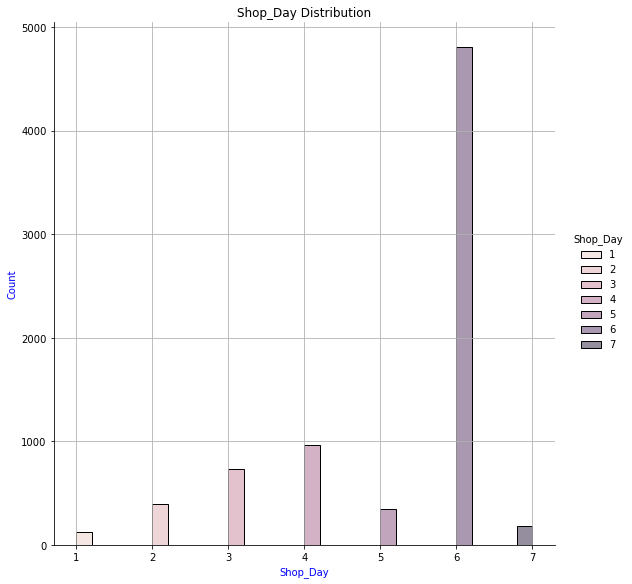

In [21]:
fig = sns.displot(df, x="Shop_Day",hue="Shop_Day", height=8)
plt.title('Shop_Day Distribution')
plt.ylabel('Count', color='blue')
plt.xlabel('Shop_Day', color='blue')
plt.grid(True) 
plt.show()

In [22]:
count_precent_tablt_Shop_Day = pd.DataFrame()
count_precent_tablt_Shop_Day["count"] = df["Shop_Day"].value_counts()
count_precent_tablt_Shop_Day["count%"] = round((df["Shop_Day"].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_Shop_Day

,count,count%
6,4804,63.595
4,969,12.828
3,736,9.743
2,391,5.176
5,351,4.647
7,179,2.370
1,124,1.642


<a id="Exploratory"></a>
# Exploratory Data Analysis 🔎


In [23]:
count_precent_tablt_profession = pd.DataFrame()
count_precent_tablt_profession['count'] = df['Group'].value_counts()
count_precent_tablt_profession['count%'] = round((df['Group'].value_counts()/df.shape[0])*100, 3)
count_precent_tablt_profession

,count,count%
D,2111,27.945
C,1860,24.623
A,1842,24.384
B,1741,23.047


##### Pivot tables:
- Spending_Score_Level - Age - Gender
- Group - Age - Gender

In [24]:
df.pivot_table('Spending_Score_Level', ['Gender', 'Age_Range']).unstack()

Spending_Score_Level                                        
Age_Range                18-30     30-40     40-50     50-60       60+
Gender                                                                
Female                1.233288  1.387685  1.573830  1.746988  2.112360
Male                  1.260450  1.541756  1.736142  1.861736  1.955901

##### As we can see, most of the customers in the data set are rated as 'low' spenders, <br> also there is no significant relationship with age or gender.

In [25]:
df.pivot_table('Group_Level', ['Gender', 'Age_Range']).unstack()

Group_Level                                        
Age_Range       18-30     30-40     40-50     50-60       60+
Gender                                                       
Female       3.092769  2.465222  2.300120  2.346988  2.382022
Male         3.286174  2.503212  2.302661  2.340836  2.360571

##### When it comes to Group classification, we can see that most of the customers in the data set are classified within the 'B' group.<br> Customers between the ages of 18-30 are classified within the 'C' group.

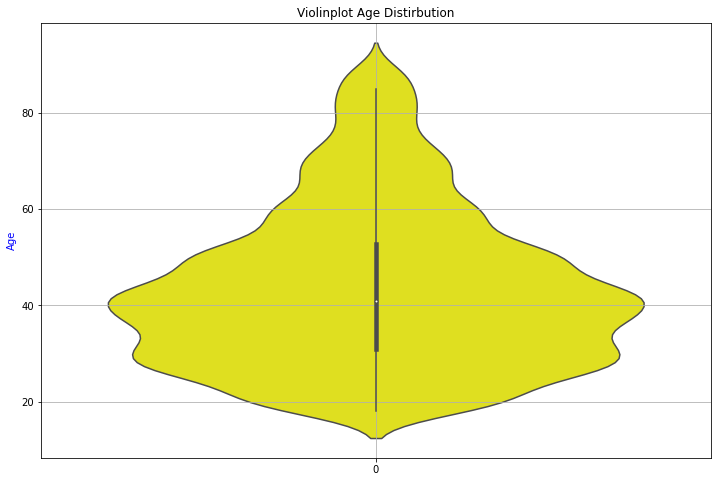

In [27]:
sns.violinplot(data=df['Age'], color='yellow')
plt.title('Violinplot Age Distirbution')
plt.ylabel('Age', color='blue')
plt.grid(True)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

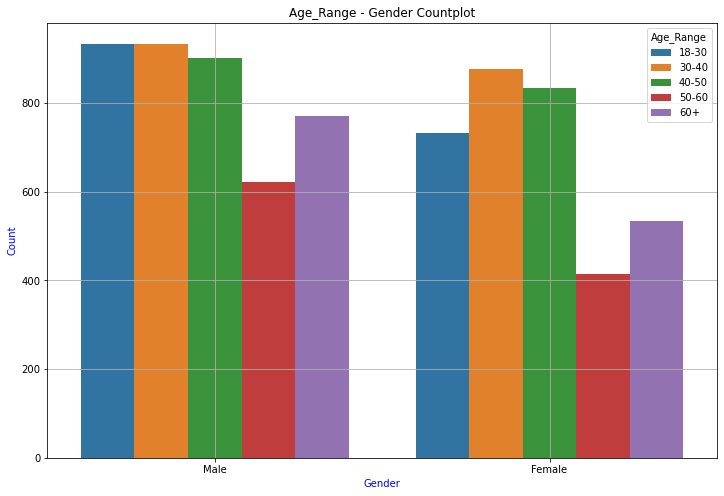

In [28]:
sns.countplot(x='Gender', hue='Age_Range', hue_order=['18-30', '30-40','40-50','50-60','60+'], data=df)
plt.title('Age_Range - Gender Countplot')
plt.ylabel('Count', color='blue')
plt.xlabel('Gender', color='blue')
plt.grid(True)
plt.show()

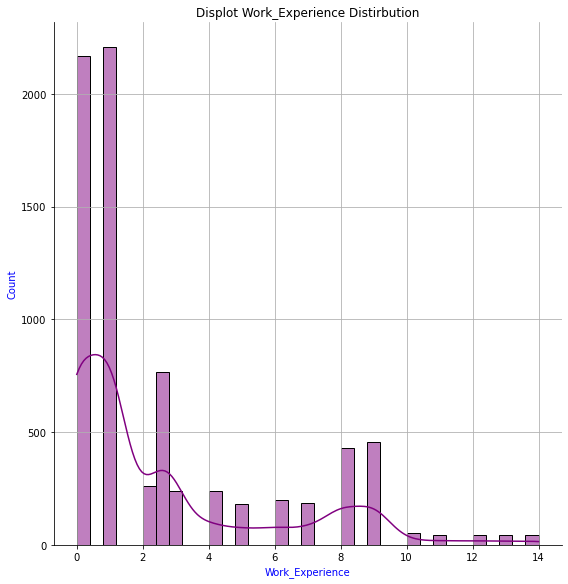

In [29]:
sns.displot(data=df['Work_Experience'], kde=True, height=8, color='purple')
plt.title('Displot Work_Experience Distirbution')
plt.ylabel('Count', color='blue')
plt.xlabel('Work_Experience', color='blue')
plt.grid(True)
plt.show()

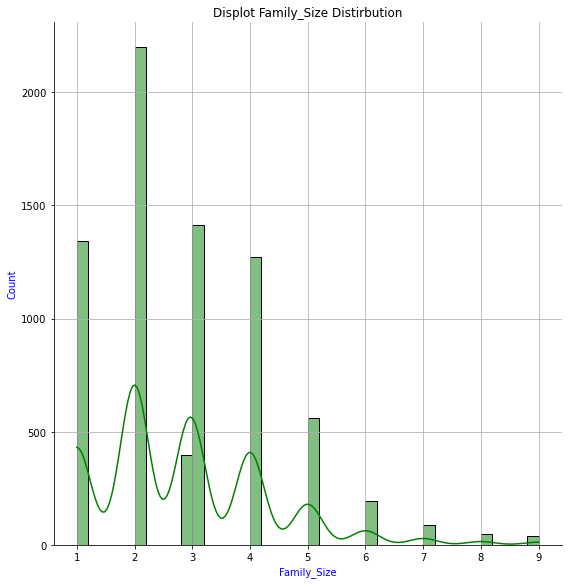

In [30]:
sns.displot(data=df['Family_Size'], kde=True, color='g', height=8)
plt.title('Displot Family_Size Distirbution')
plt.ylabel('Count', color='b')
plt.xlabel('Family_Size', color='b')
plt.grid(True)
plt.show()

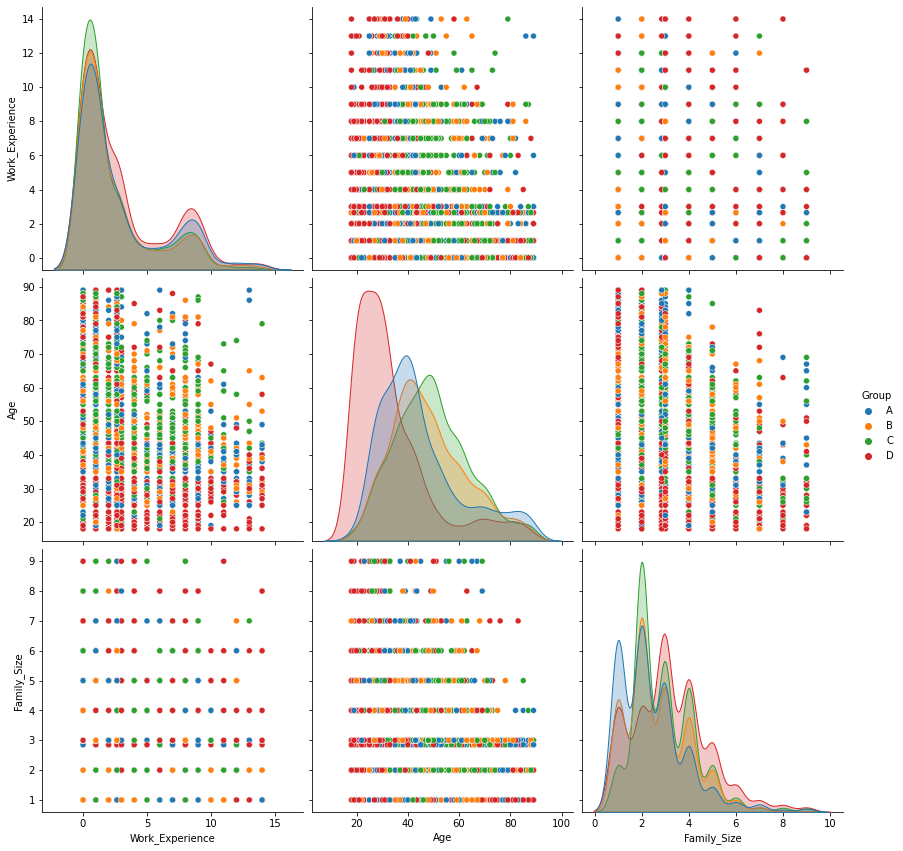

In [31]:
sns.pairplot(data=df, vars=['Work_Experience','Age','Family_Size'],hue='Group', hue_order=['A','B','C','D'], height=4)
plt.grid(True)
plt.show()

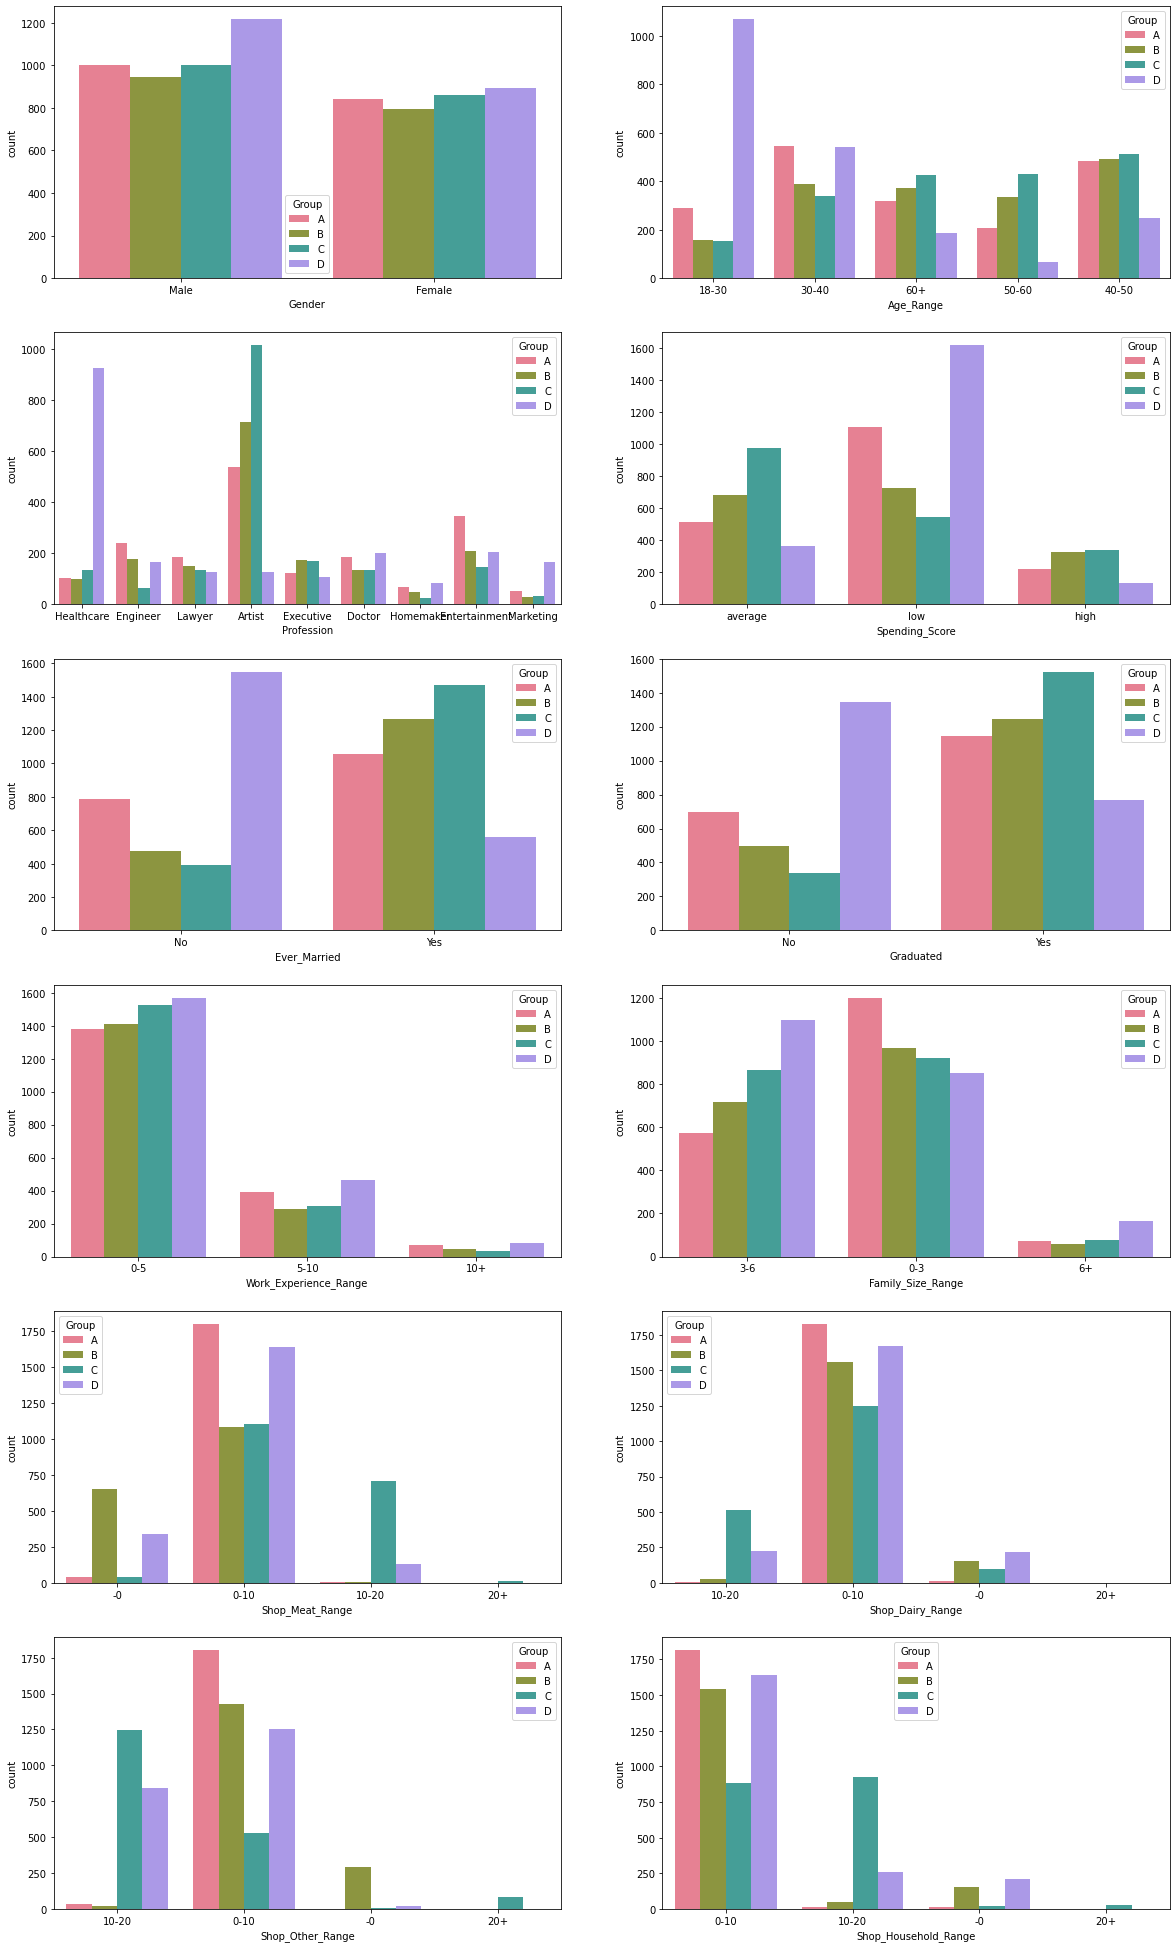

In [32]:
fig, ax = plt.subplots(6, 2, figsize=(20, 35)) # attached within the submission zip 
group_order = ['A','B','C','D']
sns.countplot(x='Gender', hue='Group', data=df, ax=ax[0][0], hue_order=group_order, palette='husl')
sns.countplot(x='Age_Range', hue='Group', data=df, ax=ax[0][1], hue_order=group_order, palette='husl')
sns.countplot(x='Profession', hue='Group', data=df, ax=ax[1][0], hue_order=group_order, palette='husl')
sns.countplot(x='Spending_Score', hue='Group', data=df, ax=ax[1][1], hue_order=group_order, palette='husl')
sns.countplot(x='Ever_Married', hue='Group', data=df, ax=ax[2][0], hue_order=group_order, palette='husl')
sns.countplot(x='Graduated', hue='Group', data=df, ax=ax[2][1], hue_order=group_order, palette='husl')
sns.countplot(x='Work_Experience_Range', hue='Group', data=df, ax=ax[3][0], hue_order=group_order, palette='husl')
sns.countplot(x='Family_Size_Range', hue='Group', data=df, ax=ax[3][1], hue_order=group_order, palette='husl')
sns.countplot(x='Shop_Meat_Range', hue='Group', data=df, ax=ax[4][0], hue_order=group_order, palette='husl')
sns.countplot(x='Shop_Dairy_Range', hue='Group', data=df, ax=ax[4][1], hue_order=group_order, palette='husl')
sns.countplot(x='Shop_Other_Range', hue='Group', data=df, ax=ax[5][0], hue_order=group_order, palette='husl')
sns.countplot(x='Shop_Household_Range', hue='Group', data=df, ax=ax[5][1], hue_order=group_order, palette='husl')
plt.savefig('Group-Others.png')
plt.show()

#### Correlation Heat Map

In [33]:
corr = df.corr()
corr

,Age,Work_Experience,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Gender_Female,Gender_Male,...,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Level,Group_Level
Age,1.000000,-0.177667,-0.269975,0.168353,-0.027483,0.021478,0.090475,0.047665,-0.030211,0.030211,...,-0.119859,-0.030134,-0.011758,0.127068,-0.438169,-0.062127,0.552978,-0.077324,0.375883,-0.234066
Work_Experience,-0.177667,1.000000,-0.057344,0.021418,-0.009510,-0.007522,-0.036019,-0.020157,0.057570,-0.057570,...,-0.004831,-0.001153,0.014652,-0.023406,-0.005233,0.178654,-0.113254,-0.003408,-0.070755,0.009677
Family_Size,-0.269975,-0.057344,1.000000,-0.138161,0.060947,0.024669,0.036408,0.046107,-0.056060,0.056060,...,0.008364,0.018835,-0.020386,0.105690,0.239501,-0.062534,-0.165518,0.028243,0.077255,0.194823
Shop_Day,0.168353,0.021418,-0.138161,1.000000,0.026602,0.016470,0.059141,0.063102,-0.033930,0.033930,...,-0.021958,-0.053163,-0.035916,0.036084,-0.084655,-0.031383,0.092651,-0.042563,0.066608,-0.018179
Shop_Other,-0.027483,-0.009510,0.060947,0.026602,1.000000,0.210421,0.346373,0.407841,0.016801,-0.016801,...,-0.002594,-0.076146,-0.059128,-0.014203,0.080564,-0.025464,-0.022943,0.021501,0.019906,0.405761
Shop_Dairy,0.021478,-0.007522,0.024669,0.016470,0.210421,1.000000,0.166044,0.204676,0.003693,-0.003693,...,0.003726,-0.020794,-0.025856,-0.001223,-0.007292,-0.007923,-0.013151,-0.003291,0.044786,0.082549
Shop_Household,0.090475,-0.036019,0.036408,0.059141,0.346373,0.166044,1.000000,0.312968,-0.000137,0.000137,...,0.002034,-0.059379,-0.057136,0.005478,-0.048128,-0.028963,0.011015,-0.028568,0.095584,0.157625
Shop_Meat,0.047665,-0.020157,0.046107,0.063102,0.407841,0.204676,0.312968,1.000000,0.003160,-0.003160,...,0.001419,-0.056308,-0.037781,0.001950,-0.026352,-0.023999,-0.011855,-0.017626,0.075067,0.171665
Gender_Female,-0.030211,0.057570,-0.056060,-0.033930,0.016801,0.003693,-0.000137,0.003160,1.000000,-1.000000,...,-0.005261,0.214406,-0.136449,-0.226743,-0.030048,0.134746,0.026040,0.048279,-0.060850,-0.022682
Gender_Male,0.030211,-0.057570,0.056060,0.033930,-0.016801,-0.003693,0.000137,-0.003160,-1.000000,1.000000,...,0.005261,-0.214406,0.136449,0.226743,0.030048,-0.134746,-0.026040,-0.048279,0.060850,0.022682


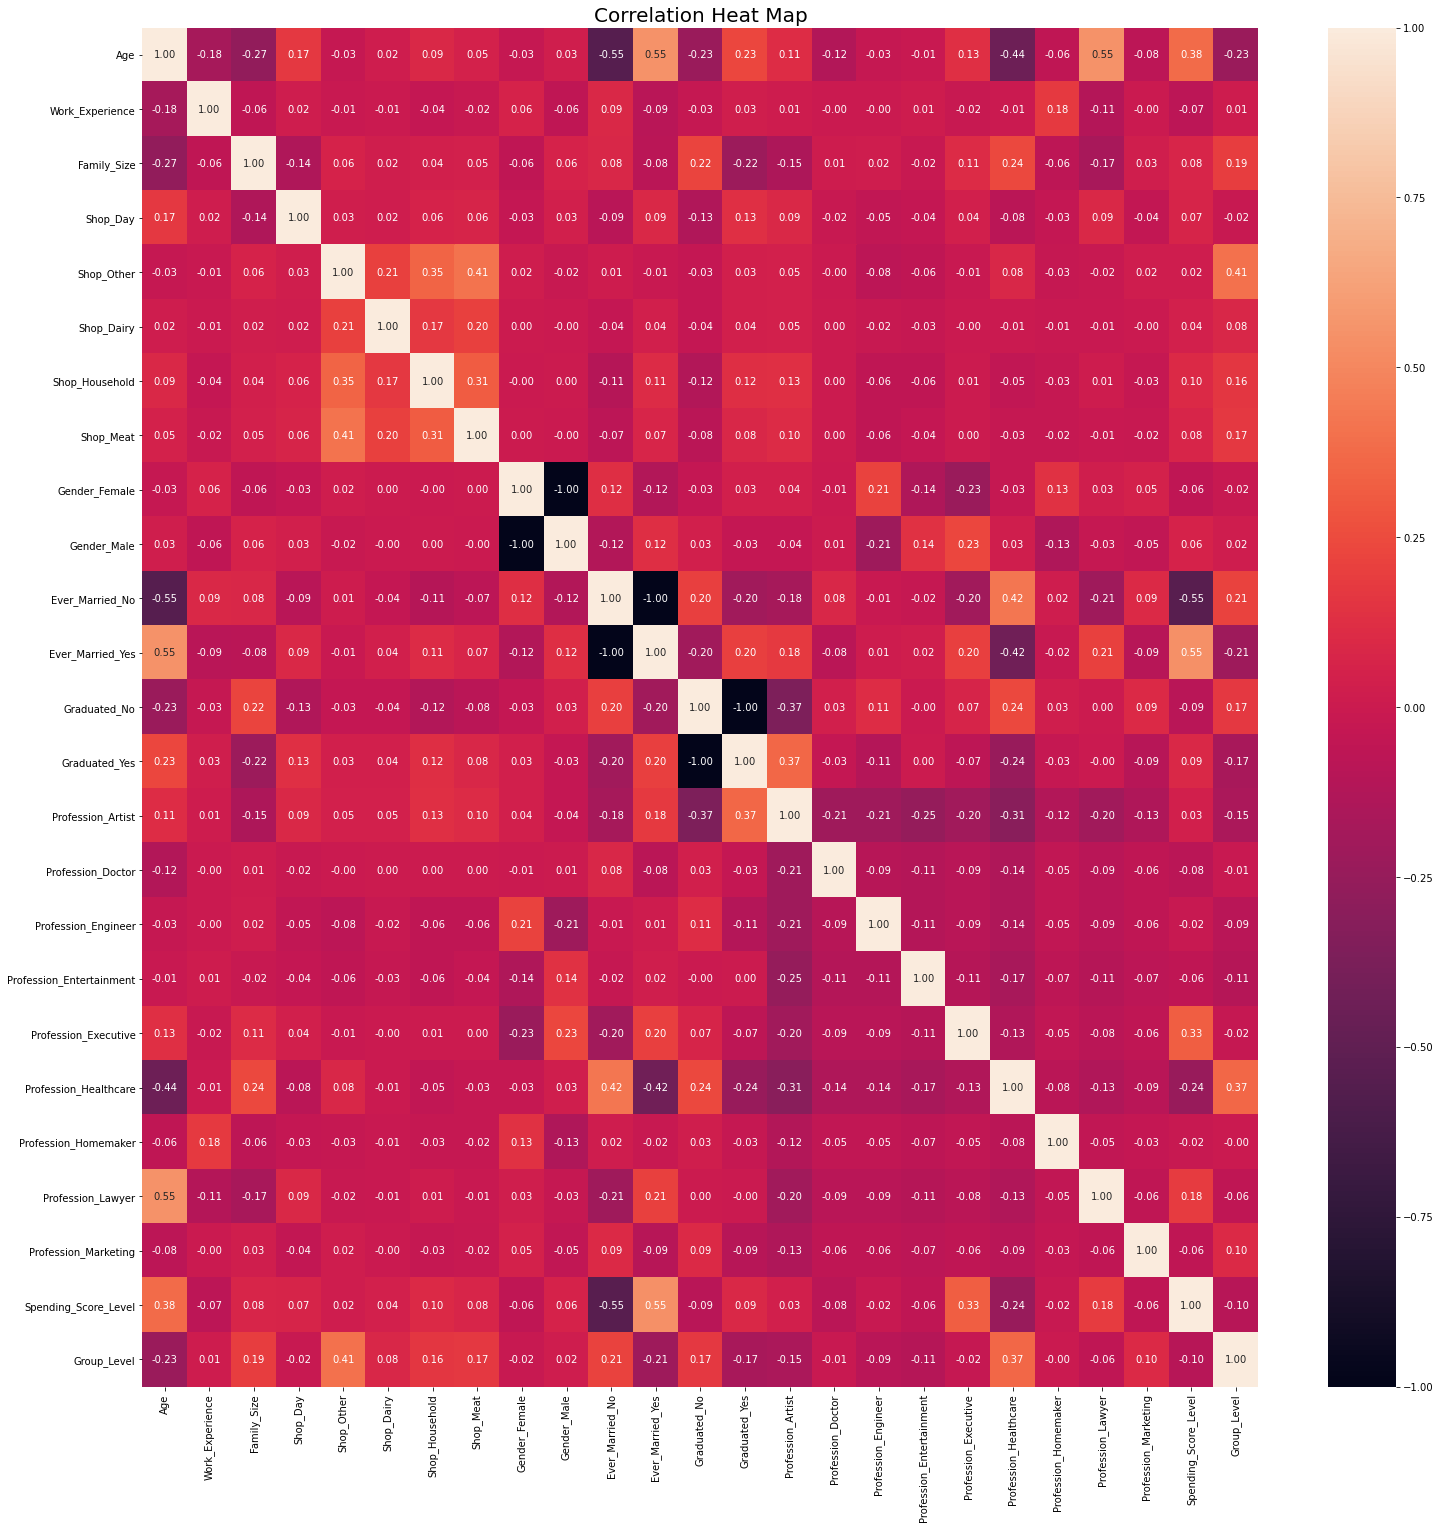

In [34]:
fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=',.2f') # attached within the submission zip 
plt.title('Correlation Heat Map', fontsize=20)
plt.show()

### Heat Map Conclusions 📌
According to the correlation heat map, we can see:
- Correlation between Ever_Married and Age_Range
- Correlation between Profession and Age_Range
- Correlation between Ever_Married and Spending_Score
- Correlation between Spending_Score and Age_Range
- Correlation between Spending_Score and Profession
- Correlation between Gender and Profession
- Correlation between Graduated and Profession
- Correlation between Ever_Married and Profession
- Correlation between all kind of shop and Profession

In the following cells, I plot each of them.

In [35]:
ax1 = df.groupby(['Ever_Married'])['Age_Range'].value_counts().unstack()
ax2 = df.groupby(['Age_Range'])['Profession'].value_counts().unstack()
ax3 = df.groupby(['Ever_Married'])['Spending_Score'].value_counts().unstack()
ax4 = df.groupby(['Age_Range'])['Spending_Score'].value_counts().unstack()
ax5 = df.groupby(['Spending_Score'])['Profession'].value_counts().unstack()
ax6 = df.groupby(['Gender'])['Profession'].value_counts().unstack()
ax7 = df.groupby(['Graduated'])['Profession'].value_counts().unstack()
ax8 = df.groupby(['Ever_Married'])['Profession'].value_counts().unstack()
ax9 = df.groupby(['Shop_Household_Range'])['Profession'].value_counts().unstack()

In [36]:
ax1

Age_Range,18-30,30-40,40-50,50-60,60+
Ever_Married,,,,,
No,1408,1010,537,163,88
Yes,258,801,1198,874,1217


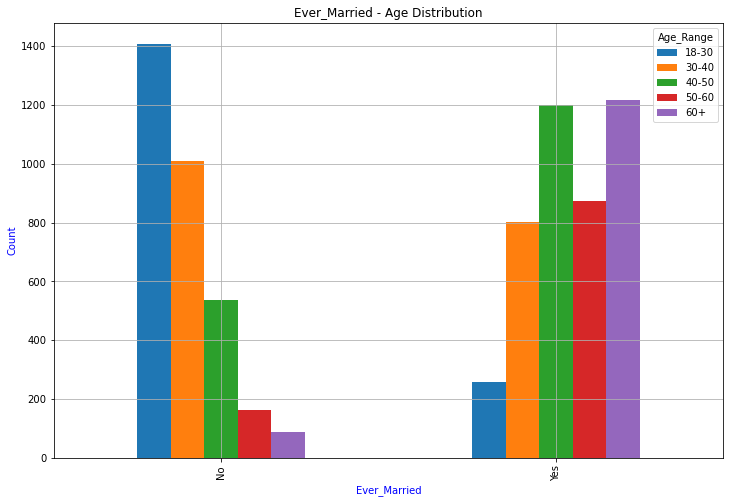

In [37]:
ax1.plot(kind='bar')
plt.title('Ever_Married - Age Distribution')
plt.xlabel('Ever_Married', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [38]:
ax2

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Age_Range,,,,,,,,,
18-30,169,194,113,147,45,829,64,3,102
30-40,570,217,189,261,96,328,81,2,67
40-50,801,143,178,239,150,81,57,16,70
50-60,524,70,104,142,125,16,14,25,17
60+,333,32,68,119,158,9,12,550,24


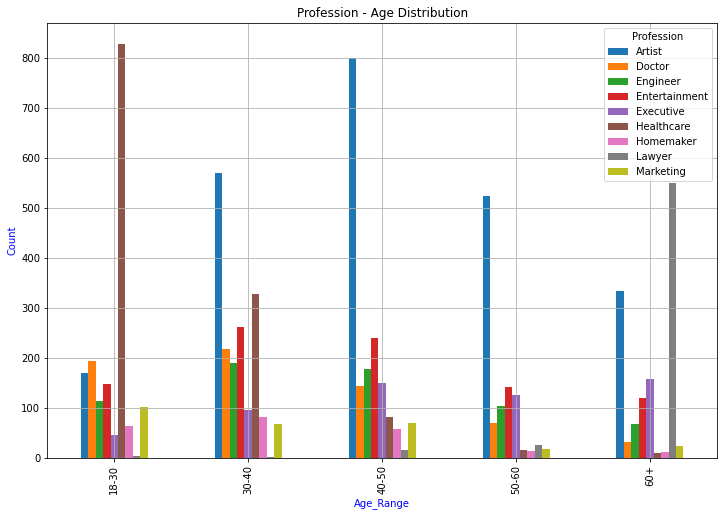

In [39]:
ax2.plot(kind='bar')
plt.title('Profession - Age Distribution')
plt.xlabel('Age_Range', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [40]:
ax3

Spending_Score,average,high,low
Ever_Married,,,
No,426,32,2748
Yes,2111,989,1248


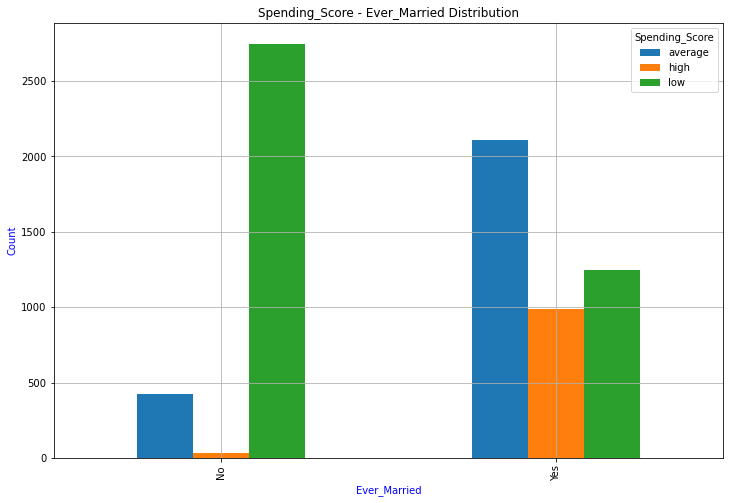

In [41]:
ax3.plot(kind='bar')
plt.title('Spending_Score - Ever_Married Distribution')
plt.xlabel('Ever_Married', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [42]:
ax4

Spending_Score,average,high,low
Age_Range,,,
18-30,296,59,1311
30-40,588,129,1094
40-50,752,195,788
50-60,512,167,358
60+,389,471,445


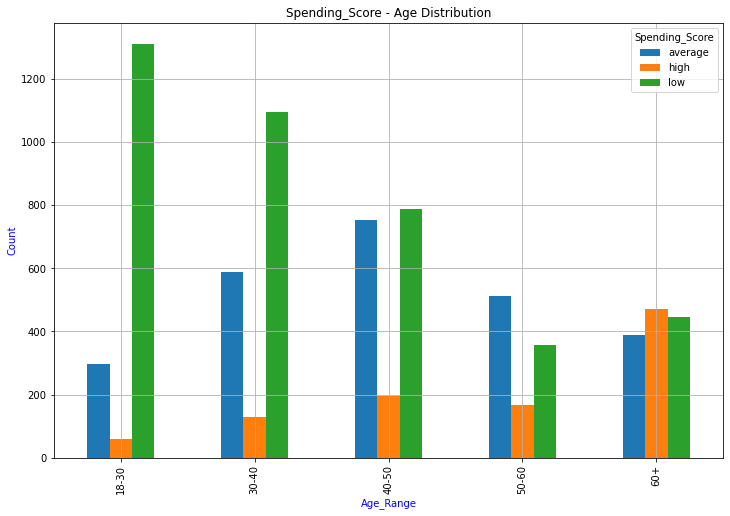

In [43]:
ax4.plot(kind='bar')
plt.title('Spending_Score - Age Distribution')
plt.xlabel('Age_Range', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [44]:
ax5

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Spending_Score,,,,,,,,,
average,1133,225,262,381,133,197,68,88,50
high,202,26,52,35,341,42,25,269,29
low,1062,405,338,492,100,1024,135,239,201


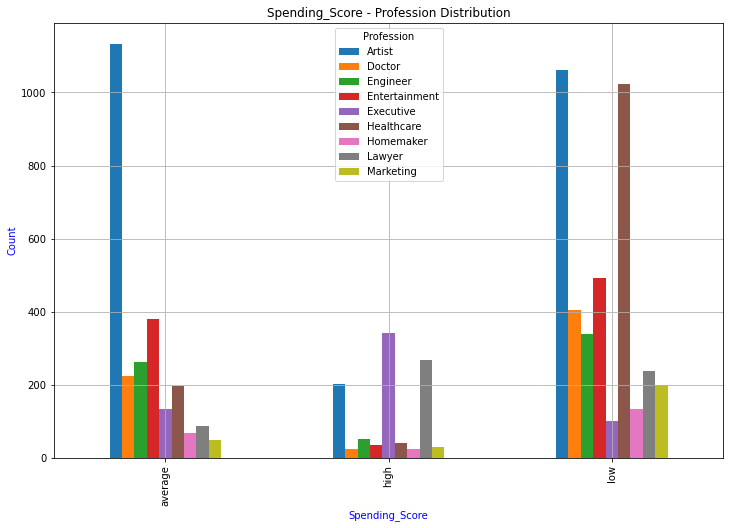

In [45]:
ax5.plot(kind='bar')
plt.title('Spending_Score - Profession Distribution')
plt.xlabel('Spending_Score', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [46]:
ax6

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Gender,,,,,,,,,
Female,1143,289,519,241,32,525,189,294,160
Male,1254,367,133,667,542,738,39,302,120


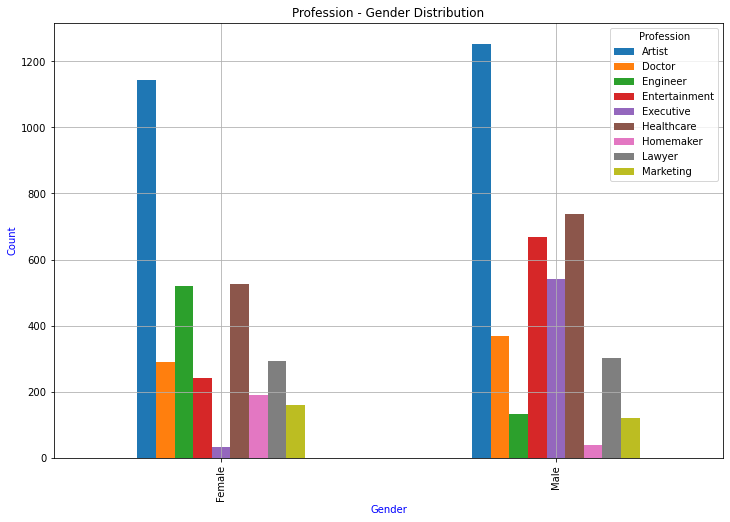

In [47]:
ax6.plot(kind='bar')
plt.title('Profession - Gender Distribution')
plt.xlabel('Gender', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [48]:
ax7

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Graduated,,,,,,,,,
No,289,283,364,343,284,809,104,231,172
Yes,2108,373,288,565,290,454,124,365,108


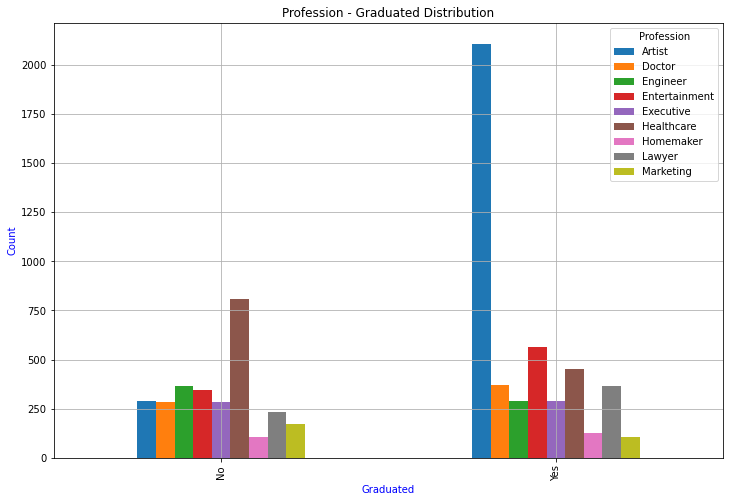

In [49]:
ax7.plot(kind='bar')
plt.title('Profession - Graduated Distribution')
plt.xlabel('Graduated', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [50]:
ax8

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Ever_Married,,,,,,,,,
No,708,364,266,356,46,1124,111,46,185
Yes,1689,292,386,552,528,139,117,550,95


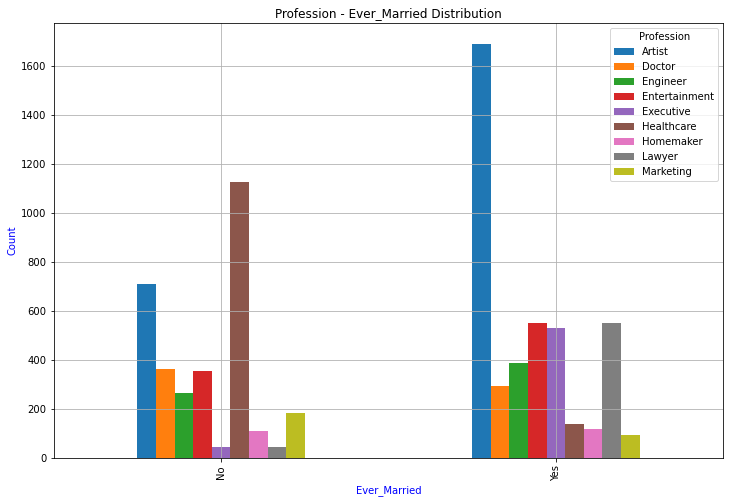

In [51]:
ax8.plot(kind='bar')
plt.title('Profession - Ever_Married Distribution')
plt.xlabel('Ever_Married', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

In [52]:
ax9

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Shop_Household_Range,,,,,,,,,
-0,93.0,15.0,34.0,48.0,37.0,107.0,17.0,26.0,23.0
0-10,1752.0,544.0,555.0,765.0,420.0,972.0,188.0,472.0,218.0
10-20,538.0,96.0,61.0,93.0,116.0,183.0,23.0,95.0,38.0
20+,14.0,1.0,2.0,2.0,1.0,1.0,NaN,3.0,1.0


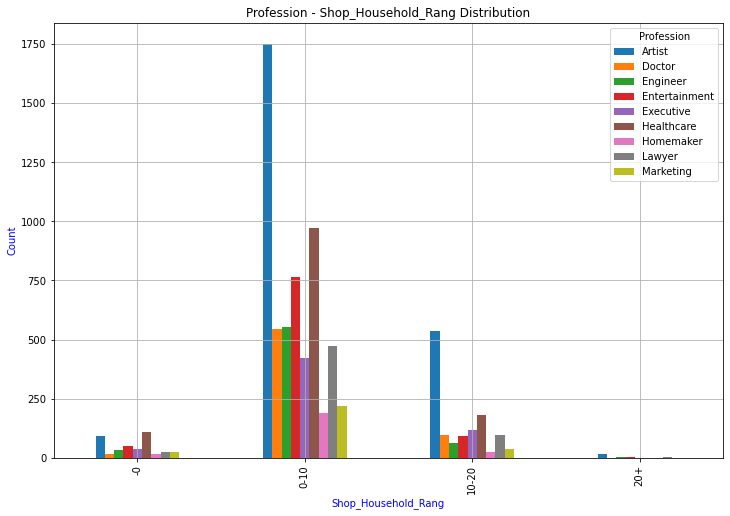

In [53]:
ax9.plot(kind='bar')
plt.title('Profession - Shop_Household_Rang Distribution')
plt.xlabel('Shop_Household_Rang', color='blue')
plt.ylabel('Count', color='blue')
plt.grid(True)
plt.show()

###### Since there is a correlation between all kind of shop and Profession, <br> I added new column to the data set that holds the average of all Shops (Meat,Dairy,Household,Other).

In [54]:
df['Avg_Shop'] = (df['Shop_Other'] + df['Shop_Dairy'] + df['Shop_Household'] + df['Shop_Meat']) / 4
df.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,...,Age_Range,Work_Experience_Range,Family_Size_Range,Shop_Other_Range,Shop_Dairy_Range,Shop_Household_Range,Shop_Meat_Range,Spending_Score_Level,Group_Level,Avg_Shop
0,Male,No,22.0,No,Healthcare,1.000,average,4.0,4,13.358,...,18-30,0-5,3-6,10-20,10-20,0-10,-0,2,4,6.95175
1,Female,Yes,38.0,Yes,Engineer,2.648,average,3.0,4,4.049,...,30-40,0-5,3-6,0-10,0-10,0-10,0-10,2,1,3.90400
2,Female,Yes,67.0,Yes,Engineer,1.000,low,1.0,6,9.349,...,60+,0-5,0-3,0-10,0-10,0-10,0-10,1,2,4.17625
3,Male,Yes,67.0,Yes,Lawyer,0.000,high,2.0,6,-0.617,...,60+,0-5,0-3,-0,-0,0-10,0-10,3,2,1.77225
4,Male,Yes,56.0,No,Artist,0.000,average,2.0,5,10.270,...,50-60,0-5,0-3,10-20,10-20,10-20,0-10,2,3,9.92225
5,Male,No,32.0,Yes,Healthcare,1.000,low,3.0,6,13.422,...,30-40,0-5,3-6,10-20,0-10,0-10,0-10,1,3,6.74650
6,Female,No,33.0,Yes,Healthcare,1.000,low,3.0,6,12.074,...,30-40,0-5,3-6,10-20,0-10,0-10,0-10,1,4,6.91700
7,Female,Yes,61.0,Yes,Engineer,0.000,low,3.0,7,8.891,...,60+,0-5,3-6,0-10,0-10,-0,0-10,1,4,4.24550
8,Female,Yes,55.0,Yes,Artist,1.000,average,4.0,6,13.460,...,50-60,0-5,3-6,10-20,0-10,0-10,10-20,2,3,10.59175
9,Female,No,26.0,Yes,Engineer,1.000,low,3.0,6,5.523,...,18-30,0-5,3-6,0-10,0-10,0-10,0-10,1,1,4.57975


##### Let's plot the scatter of Age and Avg_Shop by Group

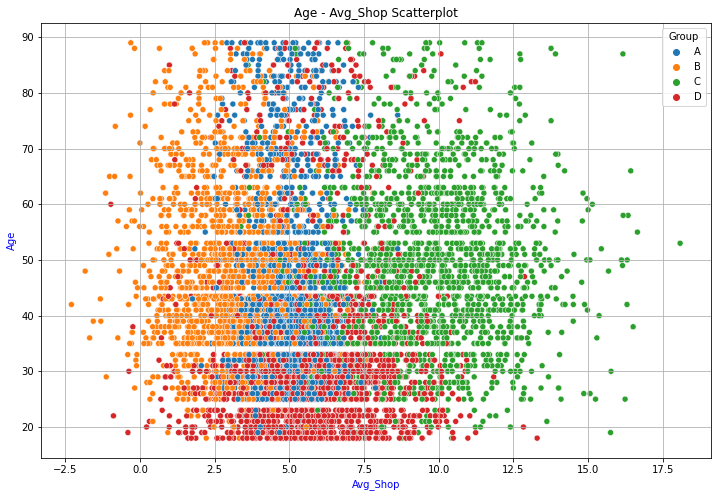

In [55]:
ax1 = sns.scatterplot(data=df, x='Avg_Shop',y='Age', hue='Group',
      hue_order=['A','B','C','D'])
plt.title('Age - Avg_Shop Scatterplot')
plt.xlabel('Avg_Shop', color='blue')
plt.ylabel('Age', color='blue')
plt.grid(True)
plt.show()

##### In the correlation heat map, we found strong correlation among all kinds of shops, let's plot the relationship between them.

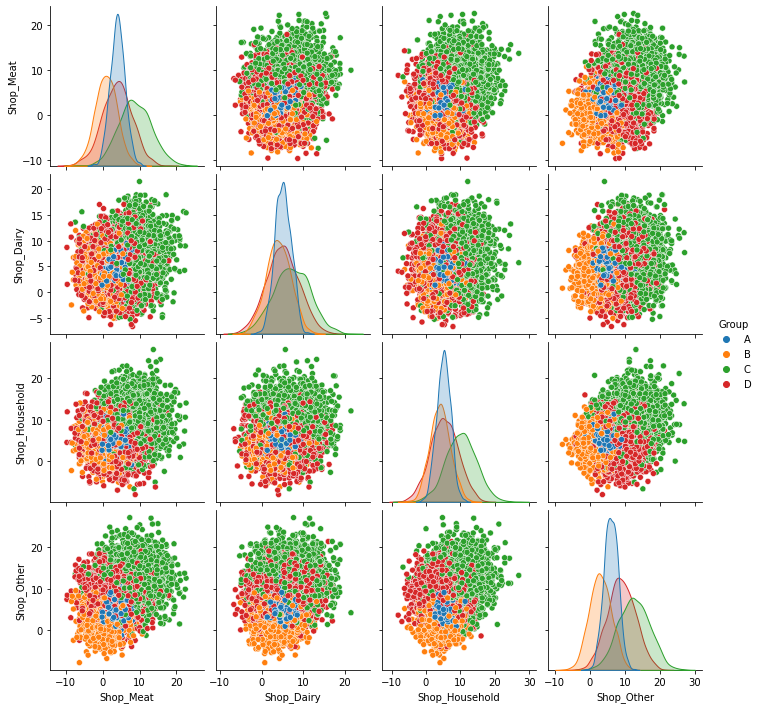

In [56]:
ax2 = sns.pairplot(data=df, hue='Group', hue_order=['A','B','C','D'],
      vars=['Shop_Meat','Shop_Dairy','Shop_Household','Shop_Other'])
plt.show()

##### In order to see the distirbution based on categorical range,<br>I added new column to the data set that holds the range of Shop average.

In [57]:
df['Avg_Shop_Range'] = np.where(df.Avg_Shop>=15, '15+', np.where(df.Avg_Shop>=5, '5-15', '-5')) # -5 < 5-15 < 15+
df.tail(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,...,Work_Experience_Range,Family_Size_Range,Shop_Other_Range,Shop_Dairy_Range,Shop_Household_Range,Shop_Meat_Range,Spending_Score_Level,Group_Level,Avg_Shop,Avg_Shop_Range
7544,Male,Yes,48.0,Yes,Executive,4.000,high,3.0,6,12.499,...,0-5,3-6,10-20,10-20,10-20,0-10,3,3,12.76400,5-15
7545,Male,No,19.0,No,Healthcare,0.000,low,3.0,6,8.398,...,0-5,3-6,0-10,0-10,0-10,0-10,1,4,7.38950,5-15
7546,Male,No,20.0,No,Healthcare,1.000,low,5.0,6,3.399,...,0-5,3-6,0-10,0-10,0-10,-0,1,2,2.48200,-5
7547,Female,Yes,25.0,Yes,Artist,0.000,average,2.0,2,-1.780,...,0-5,0-3,-0,10-20,0-10,0-10,2,2,4.62000,-5
7548,Female,Yes,66.0,Yes,Lawyer,1.000,high,2.0,6,11.402,...,0-5,0-3,10-20,0-10,10-20,0-10,3,3,9.92425,5-15
7549,Male,Yes,48.0,Yes,Artist,3.000,low,1.0,6,5.914,...,0-5,0-3,0-10,0-10,0-10,0-10,1,2,4.93125,-5
7550,Male,Yes,45.0,Yes,Entertainment,4.000,average,2.0,6,14.273,...,0-5,0-3,10-20,0-10,10-20,10-20,2,3,11.33600,5-15
7551,Male,Yes,46.0,Yes,Entertainment,5.000,low,1.0,2,11.866,...,5-10,0-3,10-20,10-20,10-20,0-10,1,3,12.01425,5-15
7552,Female,No,53.0,Yes,Entertainment,2.648,low,2.0,6,18.431,...,0-5,0-3,10-20,-0,10-20,0-10,1,3,10.60025,5-15
7553,Female,No,43.0,Yes,Healthcare,9.000,average,3.0,7,3.173,...,5-10,3-6,0-10,0-10,0-10,-0,2,1,1.75900,-5


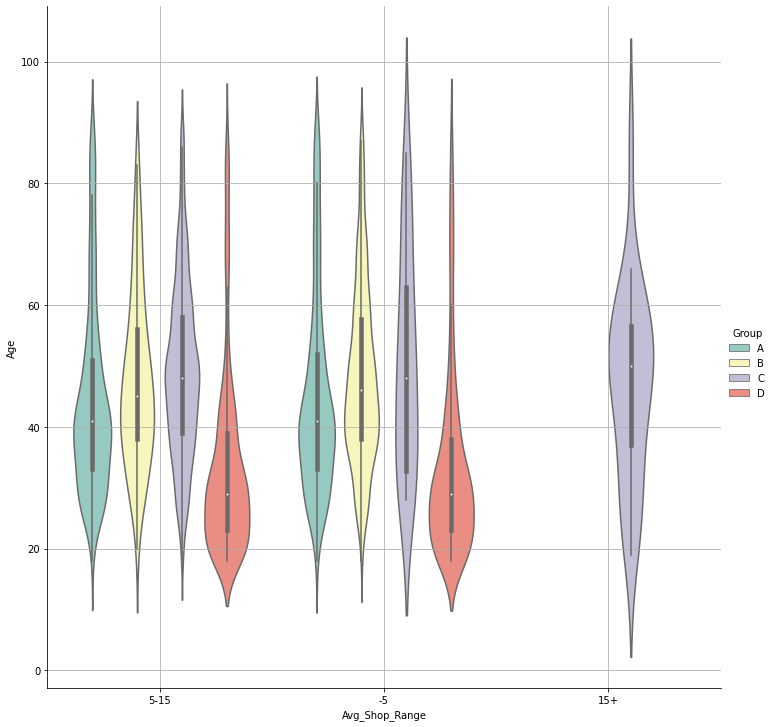

In [58]:
g = sns.catplot(x="Avg_Shop_Range", y="Age", hue="Group", hue_order=['A','B','C','D'],
                data=df, kind="violin", height=10, palette="Set3")
plt.grid(True)
plt.show()

<a id="Classification"></a>
# Classification Model 🌳

### Gaussian Naïve Bayes
##### According to the data exploration, the following features can help classified our data into their groups<br> and they might help us to build a strong model
- Age
- Shop_Other
- Shop_Dairy
- Shop_Meat
- Shop_Household
- Avg_Shop
- Profession_Healthcare 
- Ever_Married_Yes' 

In [59]:
X_customers = df[['Age','Shop_Other','Shop_Dairy','Shop_Household','Shop_Meat','Profession_Healthcare','Ever_Married_Yes']].copy()
y_customers = df['Group']

X_train, X_test, y_train, y_test = train_test_split(X_customers,y_customers,train_size=0.8,random_state=1)

model = GaussianNB()
model.fit(X_train,y_train)

y_model = model.predict(X_test)
y_pred = pd.Series(y_model,name="prediction")
predicted = pd.concat([X_test.reset_index(),y_test.reset_index(),y_pred],axis=1)
print(predicted)
print(f"accuracy_score: {round(metrics.accuracy_score(y_test, y_model)*100, 3)}%")

      index   Age  Shop_Other  Shop_Dairy  Shop_Household  Shop_Meat  \
0      2593  31.0       7.765       7.154           1.866      7.658   
1      6187  69.0       4.396       3.608           3.414      4.391   
2      7260  65.0       5.120       1.764          11.781      2.048   
3      1297  52.0       5.502       3.399           6.444      4.904   
4      3570  31.0       6.880       4.316           2.836      6.088   
...     ...   ...         ...         ...             ...        ...   
1506   3551  40.0       3.532       5.827           7.228      2.672   
1507   3225  43.0      -2.174       5.330          -0.035     -1.329   
1508    181  40.0       0.202       1.417           1.373      3.248   
1509   6709  42.0       5.199       1.936           4.841      5.560   
1510   5760  59.0       9.102      18.754           7.979     10.273   

      Profession_Healthcare  Ever_Married_Yes  index Group prediction  
0                         0                 0   2593     A     

###### Let's select the 2 features that yield the best results for a GNB classifier and show a visualization of them as a 2-d plot.

In [60]:
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2, hue=target)
    plt.grid(True)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)  # 80% training and 20% test

    clf = GaussianNB()
    clf = clf.fit(X_train, y_train)

    # Train Classifer
    prob = len(clf.classes_) == 2

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    hueorder = sorted(clf.classes_)
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:
        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.grid(True)
    plt.show()

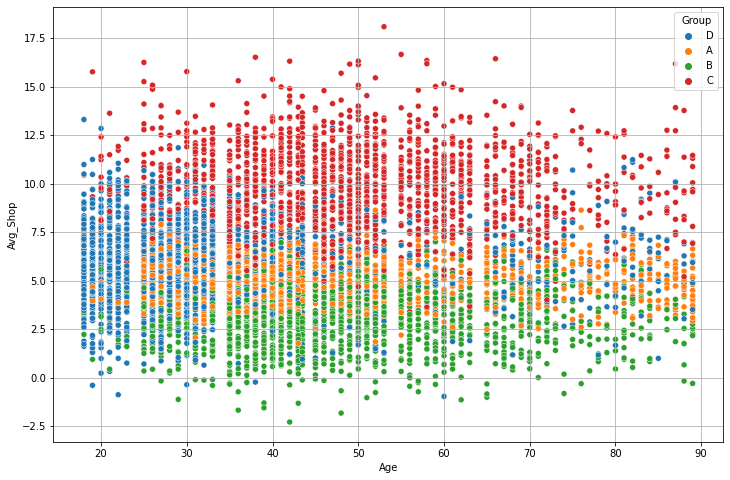

              precision    recall  f1-score   support

           A       0.54      0.66      0.59       366
           B       0.70      0.72      0.71       341
           C       0.87      0.82      0.84       379
           D       0.62      0.52      0.57       425

    accuracy                           0.67      1511
   macro avg       0.68      0.68      0.68      1511
weighted avg       0.68      0.67      0.67      1511



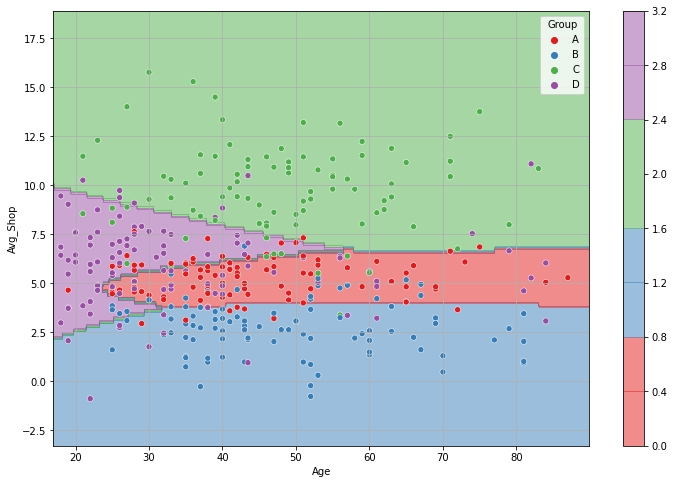

In [61]:
X_customers2 = df[['Age','Avg_Shop']].copy()
bayes_plot(pd.concat([X_customers2,y_customers],axis=1),spread = 20)

### Decision Tree

In [62]:
!conda install -y python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    fribidi-1.0.10             |       h36c2ea0_0         112 KB  conda-forge
    graphite2-1.3.13           |    h58526e2_1001         102 KB  conda-forge
    graphviz-2.42.3            |       h0511662_0         6.9 MB  conda-forge
    harfbuzz-2.4.0             |       h9f30f68_3         1.5 MB  conda-forge
    libtool-2.4.6              |    h58526e2_1007         497 KB  conda-forge
 

In [63]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

In [66]:
def show_decision_tree_report_and_pie(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)  # 80% training and 20% test
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)

    result = permutation_importance(clf,X,y,n_repeats=10,random_state=0)
    importance = zip(result['importances_mean'], X.columns)

    features = []
    values = []
    print('Features Importance:')
    for v,i in sorted(importance, reverse=True): # descending order
        features.append(i)
        values.append(v)
        print(f'Feature: %s scores: %.5f' % (i,v))


    # pie chart
    pie = plt.pie(values, labels=features, autopct='%1.1f%%', startangle=90, normalize=True)
    plt.rcParams['figure.figsize'] = [15, 12]
    plt.show()

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    return clf, X



##### a. Baseline Decision Tree<br>Baseline Decision Tree classification report for the dataset, trained using the original data while dropping NA values

Features Importance:
Feature: Shop_Other scores: 0.37168
Feature: Shop_Meat scores: 0.28550
Feature: Shop_Household scores: 0.23718
Feature: Age scores: 0.22248
Feature: Shop_Dairy scores: 0.14382
Feature: Family_Size scores: 0.06361
Feature: Shop_Day scores: 0.02528
Feature: Work_Experience scores: 0.02474


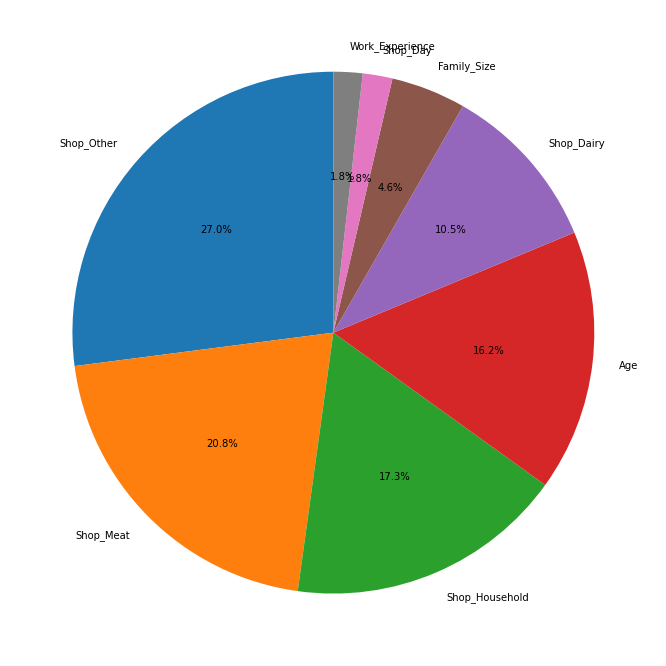

              precision    recall  f1-score   support

           A       0.65      0.63      0.64       286
           B       0.67      0.62      0.64       282
           C       0.79      0.77      0.78       293
           D       0.54      0.62      0.58       272

    accuracy                           0.66      1133
   macro avg       0.66      0.66      0.66      1133
weighted avg       0.67      0.66      0.66      1133



In [67]:
fresh_df = pd.read_csv('customers2.csv')
fresh_df.dropna(inplace=True)
categorical_to_drop = ['ID','Gender','Ever_Married','Graduated','Profession','Spending_Score','Group']
fresh_X = fresh_df.drop(categorical_to_drop,axis=1)
fresh_y = fresh_df['Group']

clf, X = show_decision_tree_report_and_pie(fresh_X, fresh_y)

In [68]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,
                feature_names=X.columns,class_names=clf.classes_)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Customers - Baseline_DecisionTreeClassifier.png') # attached within the submission zip
Image(graph.create_png())

##### b. Decision Tree Classifier based on manipulated data set
- Select the most relevant features. 
- Final decision tree classification report and model visualization.
- Is there any improvement in the performance 

In [69]:
categorical_to_drop = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Group',
                       'Family_Size_Range','Work_Experience_Range','Shop_Other_Range','Shop_Dairy_Range',
                       'Shop_Household_Range','Shop_Meat_Range','Avg_Shop_Range','Age_Range','Group_Level']

customers_X = df.drop(categorical_to_drop,axis=1).copy()
customers_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       7554 non-null   float64
 1   Work_Experience           7554 non-null   float64
 2   Family_Size               7554 non-null   float64
 3   Shop_Day                  7554 non-null   int64  
 4   Shop_Other                7554 non-null   float64
 5   Shop_Dairy                7554 non-null   float64
 6   Shop_Household            7554 non-null   float64
 7   Shop_Meat                 7554 non-null   float64
 8   Gender_Female             7554 non-null   uint8  
 9   Gender_Male               7554 non-null   uint8  
 10  Ever_Married_No           7554 non-null   uint8  
 11  Ever_Married_Yes          7554 non-null   uint8  
 12  Graduated_No              7554 non-null   uint8  
 13  Graduated_Yes             7554 non-null   uint8  
 14  Professi

Features Importance:
Feature: Avg_Shop scores: 0.42016
Feature: Shop_Other scores: 0.22927
Feature: Shop_Meat scores: 0.15953
Feature: Age scores: 0.15645
Feature: Shop_Household scores: 0.14530
Feature: Shop_Dairy scores: 0.10038
Feature: Profession_Healthcare scores: 0.06010
Feature: Profession_Artist scores: 0.05841
Feature: Spending_Score_Level scores: 0.05175
Feature: Family_Size scores: 0.04576
Feature: Ever_Married_Yes scores: 0.03088
Feature: Ever_Married_No scores: 0.01729
Feature: Work_Experience scores: 0.01726
Feature: Shop_Day scores: 0.01615
Feature: Graduated_Yes scores: 0.01435
Feature: Graduated_No scores: 0.01007
Feature: Profession_Marketing scores: 0.00916
Feature: Profession_Entertainment scores: 0.00892
Feature: Profession_Executive scores: 0.00815
Feature: Gender_Female scores: 0.00646
Feature: Profession_Doctor scores: 0.00548
Feature: Profession_Engineer scores: 0.00474
Feature: Profession_Homemaker scores: 0.00389
Feature: Gender_Male scores: 0.00338
Feature: 

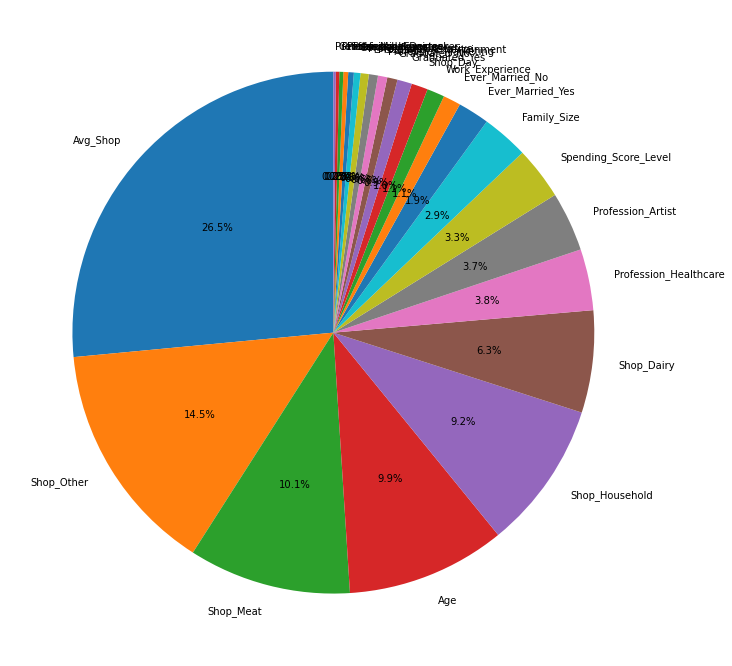

              precision    recall  f1-score   support

           A       0.64      0.64      0.64       366
           B       0.67      0.69      0.68       341
           C       0.84      0.81      0.82       379
           D       0.65      0.65      0.65       425

    accuracy                           0.70      1511
   macro avg       0.70      0.70      0.70      1511
weighted avg       0.70      0.70      0.70      1511



In [70]:
customers_y = df['Group']
clf, X = show_decision_tree_report_and_pie(customers_X, customers_y)

#### We can see an improvement in the model accuracy from 0.66 to 0.7

In [72]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,
                feature_names=X.columns,class_names=clf.classes_)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Customers - manipulated_DecisionTreeClassifier.png') # attached within the submission zip
Image(graph.create_png())

#### Let's use the two best features according to the pie chart we got

Features Importance:
Feature: Avg_Shop scores: 0.55932
Feature: Shop_Other scores: 0.43617


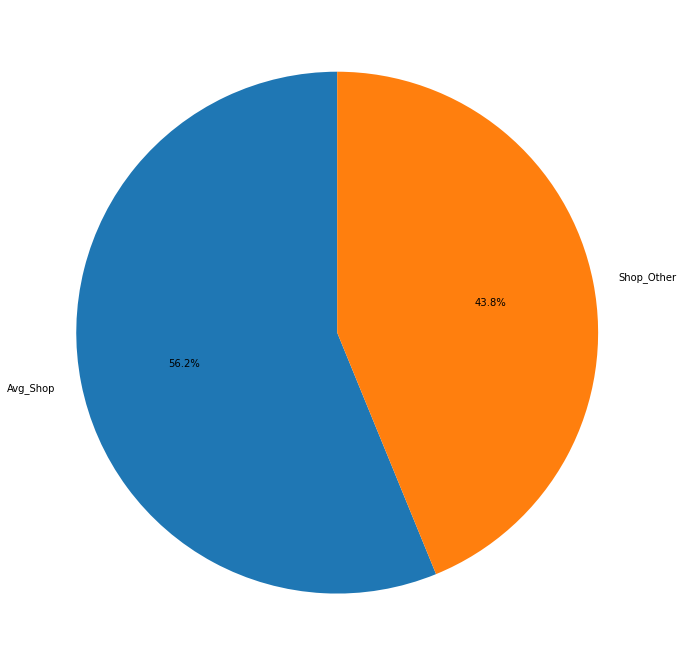

              precision    recall  f1-score   support

           A       0.50      0.49      0.49       366
           B       0.58      0.60      0.59       341
           C       0.72      0.75      0.73       379
           D       0.44      0.42      0.43       425

    accuracy                           0.56      1511
   macro avg       0.56      0.56      0.56      1511
weighted avg       0.56      0.56      0.56      1511



In [73]:
X_customers2 = df[['Shop_Other','Avg_Shop']].copy()
clf, X = show_decision_tree_report_and_pie(X_customers2, customers_y)

##### Let's try to limit the tree's depth to 4

In [74]:
X_train, X_test, y_train, y_test = train_test_split(customers_X,customers_y,train_size=0.8,random_state=1)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,
                feature_names=customers_X.columns,class_names=clf.classes_)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Customers - DecisionTreeClassifier by Two Best Features max_depth=4.png') # attached within the submission zip
Image(graph.create_png())

              precision    recall  f1-score   support

           A       0.57      0.80      0.67       366
           B       0.77      0.63      0.69       341
           C       0.88      0.81      0.84       379
           D       0.71      0.61      0.66       425

    accuracy                           0.71      1511
   macro avg       0.73      0.71      0.71      1511
weighted avg       0.73      0.71      0.71      1511



##### Now, let's try to limit the tree's depth to 4 and change the criterion to entropy instead of the default gini

In [75]:
X_train, X_test, y_train, y_test = train_test_split(customers_X,customers_y,train_size=0.8,random_state=1)

clf = DecisionTreeClassifier(max_depth=4,criterion='entropy')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,
                feature_names=customers_X.columns,class_names=clf.classes_)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Customers - DecisionTreeClassifier by Two Best Features max_depth=4 criterion=entropy.png') # attached within the submission zip
Image(graph.create_png())

              precision    recall  f1-score   support

           A       0.58      0.81      0.67       366
           B       0.74      0.62      0.67       341
           C       0.90      0.80      0.85       379
           D       0.69      0.60      0.64       425

    accuracy                           0.71      1511
   macro avg       0.72      0.71      0.71      1511
weighted avg       0.72      0.71      0.71      1511



<a id="Summary"></a>
# Summary 📝

#### Results Overview
As we can see, the model did better where data is clean and even better than that where its depth was limited to 4.
When I tried to plot the model using the best two features according to the features importance list I got less accurate results.

#### Issues
Through this exercise, I have encountered some issues I needed to overcome such as finding the best feature (in my case create it with a new avg column), clean the data over and over again and lot's of 'connection failed' Jupiter errors.

#### Insights from the Analysis
I found the best feature for classified my data set into groups was the one I added that holds the average of all kinds of shops, also I found I was wrong in most of my initial thoughts about the data set.

####  classification performance measure
I found the accuracy measure as best fit with the data set since the classes are balanced.